In [4]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Broblem 1

x = sy.symbols('x')
fx = (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
dfdx = sy.diff((sy.sin(x) + 1) ** sy.sin(sy.cos(x)), x)
dfdx

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

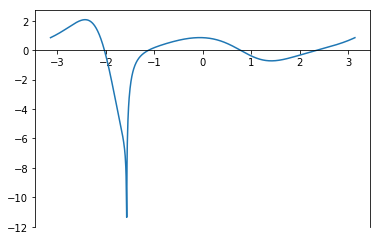

In [3]:
f_prime_x = sy.lambdify(x, dfdx, 'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
xx = np.linspace(-np.pi, np.pi, num = 1000)
yy = f_prime_x(xx)
plt.plot(xx, yy)

<IPython.core.display.Javascript object>


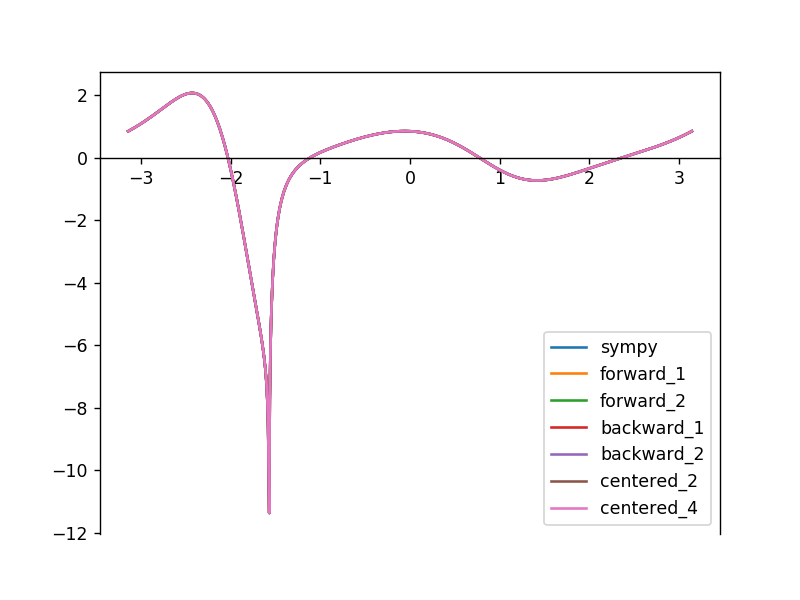

In [4]:
# Problem 2

def forward_1(f, x, h):
    return (f(x + h) - f(x)) / h

def forward_2(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

def backward_1(f, x, h):
    return (f(x) - f(x - h)) / h

def backward_2(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

def centered_2(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def centered_4(f, x, h):
    return (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

%matplotlib notebook
h = 1e-6

f_prime_x = sy.lambdify(x, dfdx, 'numpy')
f = sy.lambdify(x, fx, 'numpy')
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
xx = np.linspace(-np.pi, np.pi, num = 1000)
yy1 = f_prime_x(xx)
yy2 = forward_1(f, xx, h)
yy3 = forward_2(f, xx, h)
yy4 = backward_1(f, xx, h)
yy5 = backward_2(f, xx, h)
yy6 = centered_2(f, xx, h)
yy7 = centered_4(f, xx, h)
plt.plot(xx, yy1, label = 'sympy')
plt.plot(xx, yy2, label = 'forward_1')
plt.plot(xx, yy3, label = 'forward_2')
plt.plot(xx, yy4, label = 'backward_1')
plt.plot(xx, yy5, label = 'backward_2')
plt.plot(xx, yy6, label = 'centered_2')
plt.plot(xx, yy7, label = 'centered_4')
plt.legend(loc='lower right')

#We change h, the difference between sympy and the rest may be significant.
#With h = 1e-6, the differnce is very different to tell (may be observed if zoom in a lot).

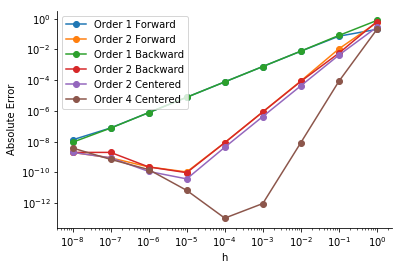

In [22]:
# Problem 3
%matplotlib inline

def approx_error(x0, h):
    '''h is an array of the approximation stepsize'''
    exact = f_prime_x(x0)
    f = sy.lambdify(x, fx, 'numpy')
    error_matrix = np.zeros((6, len(h)))
    error_matrix[0] = abs(forward_1(f, x0, h) - exact)
    error_matrix[1] = abs(forward_2(f, x0, h) - exact)
    error_matrix[2] = abs(backward_1(f, x0, h) - exact)
    error_matrix[3] = abs(backward_2(f, x0, h) - exact)
    error_matrix[4] = abs(centered_2(f, x0, h) - exact)
    error_matrix[5] = abs(centered_4(f, x0, h) - exact)
    return error_matrix
    
hh = np.logspace(-8, 0, 9)
x0  = 1
ax = plt.gca()
plt.loglog(hh, approx_error(x0, hh)[0], '-o', label = 'Order 1 Forward')
plt.loglog(hh, approx_error(x0, hh)[1], '-o', label = 'Order 2 Forward')
plt.loglog(hh, approx_error(x0, hh)[2], '-o', label = 'Order 1 Backward')
plt.loglog(hh, approx_error(x0, hh)[3], '-o', label = 'Order 2 Backward')
plt.loglog(hh, approx_error(x0, hh)[4], '-o', label = 'Order 2 Centered')
plt.loglog(hh, approx_error(x0, hh)[5], '-o', label = 'Order 4 Centered')
plt.legend(loc = 'upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('h')
ax.set_ylabel('Absolute Error')
plt.show()

In [32]:
# Problem 4

def Jacobian(f, x0, h):
    '''f: an array of functons
    x0: an array of floats
    h: the approximation stepsize, float'''
    I = np.eye(len(x0)) # then e_j = I[j]
    JT = np.zeros((len(x0), len(f(x0))))
    for i in range(len(x0)):
        JT[i] = (f(x0 + h*I[i]) - f(x0 - h*I[i])) / (2*h)
    return JT.T

In [33]:
f = lambda x: np.array([x[0]**2, x[0]**3 - x[1]])
x0 = [1,1,1]
h = 1e-6
print(Jacobian(f, x0, h))

[[ 2.  0.  0.]
 [ 3. -1.  0.]]


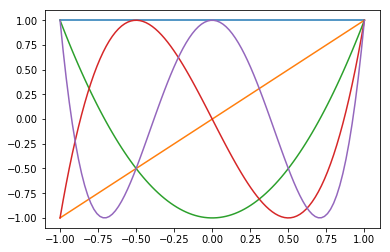

ValueError: setting an array element with a sequence.

In [20]:
# Problem 5
from autograd import numpy as anp
from autograd import elementwise_grad

def chebyshev_poly(x, n):
    '''
    x: an array of nodes
    n: integer, represents the order of the chebyshev polynomial'''
    x = anp.array(x)
    T = anp.zeros((n+1, len(x)))
    T[0] = anp.ones_like(x)
    T[1] = x
    for i in range(2, n+1):
        T[i] = 2 * x * T[i-1] - T[i-2]
    return T

xx = anp.linspace(-1, 1, 100)
chebyshev_poly(xx, 4)
for i in range(4+1):
    plt.plot(xx, chebyshev_poly(xx, 4)[i])
plt.show()

def chebyshev_derivative(x, n):
    derivative = elementwise_grad(chebyshev_poly)
    return derivative(x, n)
# chebyshev_poly are not functions but an array of values?

for i in range(4+1):
    plt.plot(xx, chebyshev_derivative(xx, 4)[i])
plt.show()